Лабораторна робота №4

Тема: Бінарна класифікація на основі даних Titanic

Мета: Закріпити знання, отримані під час лекції з класифікації, застосовуючи різні моделі машинного навчання для прогнозування виживання пасажирів на основі набору даних Titanic. Практичне завдання спрямоване на розвиток навичок роботи з реальними даними, підготовки даних, побудови моделей та їх оцінки.

Завдання №1 Підготовка середовища:

Встановіть необхідні бібліотеки, такі як pandas, numpy, scikit-learn, matplotlib, та seaborn.
Завантажте набір даних Titanic з Kaggle або використайте вбудовані дані Titanic з бібліотеки seaborn.
Встановлення бібліотек
pip install pandas numpy scikit-learn matplotlib seaborn


In [1]:
import seaborn as sns
import pandas as pd

# Завантаження набору даних Titanic
titanic_data = sns.load_dataset('titanic')

# Виведення перших кількох рядків
print(titanic_data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


Завдання №2 Ознайомлення з даними:

Виведіть перші 10 рядків набору даних.
Отримайте базову статистику за допомогою методу describe() та дослідіть пропущені значення.

In [2]:
import seaborn as sns
import pandas as pd

# Завантаження набору даних Titanic
titanic_data = sns.load_dataset('titanic')

# Виведення перших 10 рядків
print(titanic_data.head(10))

# Отримання базової статистики
print(titanic_data.describe())

# Дослідження пропущених значень
print(titanic_data.isnull().sum())

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

Завдання №3 Попередня обробка даних:

Визначте та обробіть пропущені значення: У змінній Age заповніть пропуски середнім значенням. У змінній Embarked заповніть пропуски найбільш поширеним значенням (модою).
Закодуйте категоріальні змінні: Використайте One-Hot Encoding для змінних Sex та Embarked.
Створіть нові ознаки: Додайте змінну FamilySize, яка буде сумою SibSp та Parch.

In [3]:
import seaborn as sns
import pandas as pd

# Завантаження набору даних Titanic
titanic_data = sns.load_dataset('titanic')

# Обробка пропущених значень
titanic_data['age'].fillna(titanic_data['age'].mean(), inplace=True)
titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0], inplace=True)

# One-Hot Encoding для змінних Sex та Embarked
titanic_data = pd.get_dummies(titanic_data, columns=['sex', 'embarked'], drop_first=True)

# Створення нової ознаки FamilySize
titanic_data['FamilySize'] = titanic_data['sibsp'] + titanic_data['parch']

# Виведення перших кількох рядків для перевірки
print(titanic_data.head())

   survived  pclass   age  sibsp  parch     fare  class    who  adult_male  \
0         0       3  22.0      1      0   7.2500  Third    man        True   
1         1       1  38.0      1      0  71.2833  First  woman       False   
2         1       3  26.0      0      0   7.9250  Third  woman       False   
3         1       1  35.0      1      0  53.1000  First  woman       False   
4         0       3  35.0      0      0   8.0500  Third    man        True   

  deck  embark_town alive  alone  sex_male  embarked_Q  embarked_S  FamilySize  
0  NaN  Southampton    no  False      True       False        True           1  
1    C    Cherbourg   yes  False     False       False       False           1  
2  NaN  Southampton   yes   True     False       False        True           0  
3    C  Southampton   yes  False     False       False        True           1  
4  NaN  Southampton    no   True      True       False        True           0  


C:\Users\gomel\AppData\Local\Temp\ipykernel_3368\2292234433.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['age'].fillna(titanic_data['age'].mean(), inplace=True)
C:\Users\gomel\AppData\Local\Temp\ipykernel_3368\2292234433.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

Завдання №4 Поділ даних на тренувальну та тестову вибірки:

Розділіть набір даних на тренувальну (80%) та тестову (20%) вибірки, використовуючи train_test_split() з бібліотеки scikit-learn.

In [4]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

# Завантаження та обробка набору даних Titanic
titanic_data = sns.load_dataset('titanic')
titanic_data['age'].fillna(titanic_data['age'].mean(), inplace=True)
titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0], inplace=True)
titanic_data = pd.get_dummies(titanic_data, columns=['sex', 'embarked'], drop_first=True)
titanic_data['FamilySize'] = titanic_data['sibsp'] + titanic_data['parch']

# Вибір ознак та цільової змінної
features = titanic_data.drop(['survived'], axis=1)
target = titanic_data['survived']

# Поділ на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Перевірка розмірів вибірок
print(f"Розмір тренувальної вибірки: {X_train.shape}")
print(f"Розмір тестової вибірки: {X_test.shape}")

Розмір тренувальної вибірки: (712, 16)
Розмір тестової вибірки: (179, 16)


C:\Users\gomel\AppData\Local\Temp\ipykernel_3368\3839615075.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['age'].fillna(titanic_data['age'].mean(), inplace=True)
C:\Users\gomel\AppData\Local\Temp\ipykernel_3368\3839615075.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

Завдання №5

Побудова моделей: Реалізуйте наступні моделі для бінарної класифікації: Логістична регресія. Дерева рішень. Випадкові ліси (Random Forest).
Для кожної моделі виконайте: Тренування на тренувальній вибірці. Передбачення на тестовій вибірці. Оцінку метрик: точність (accuracy), precision, recall, F1-score.

In [7]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Завантаження датасету Titanic
data = sns.load_dataset('titanic')

# Вибір ознак та мітки
X = data[['pclass', 'sex', 'age', 'fare', 'sibsp', 'parch']]
y = data['survived']

# Обробка категоріальних змінних
X = pd.get_dummies(X, drop_first=True)

# Заповнення пропущених значень у колонці 'age'
X['age'] = X['age'].fillna(X['age'].median())

# Розділення даних на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Логістична регресія
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Оцінка метрик для логістичної регресії
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Precision:", precision_score(y_test, y_pred_log_reg))
print("Recall:", recall_score(y_test, y_pred_log_reg))
print("F1-score:", f1_score(y_test, y_pred_log_reg))

# Дерева рішень
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Оцінка метрик для дерев рішень
print("\nDecision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))
print("F1-score:", f1_score(y_test, y_pred_tree))

# Випадкові ліси
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Оцінка метрик для випадкових лісів
print("\nRandom Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))

Logistic Regression Metrics:
Accuracy: 0.8100558659217877
Precision: 0.803030303030303
Recall: 0.7162162162162162
F1-score: 0.7571428571428571

Decision Tree Metrics:
Accuracy: 0.7486033519553073
Precision: 0.6986301369863014
Recall: 0.6891891891891891
F1-score: 0.6938775510204082

Random Forest Metrics:
Accuracy: 0.8044692737430168
Precision: 0.7746478873239436
Recall: 0.7432432432432432
F1-score: 0.7586206896551724



Confusion Matrix for Logistic Regression:
 [[92 13]
 [21 53]]


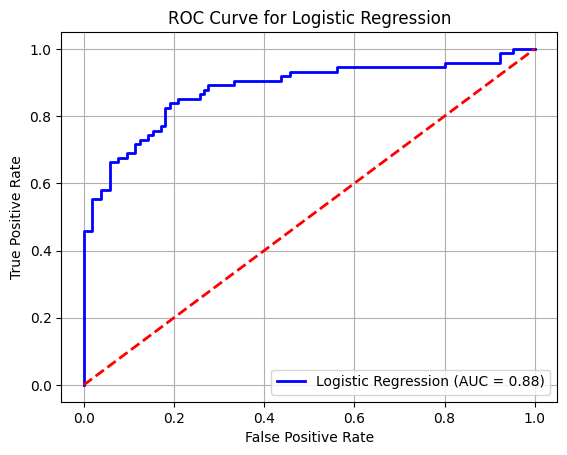


Confusion Matrix for Decision Tree:
 [[84 21]
 [21 53]]


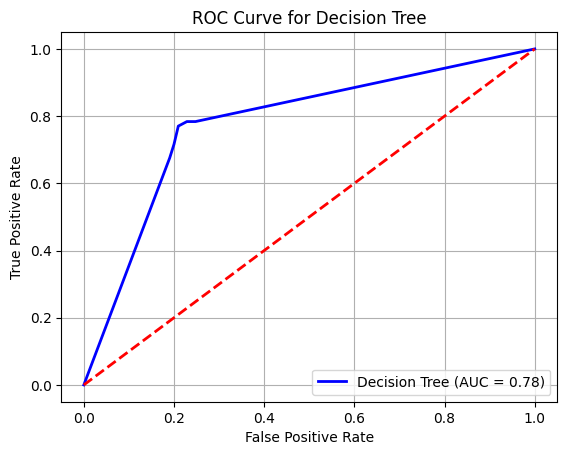


Confusion Matrix for Random Forest:
 [[89 16]
 [19 55]]


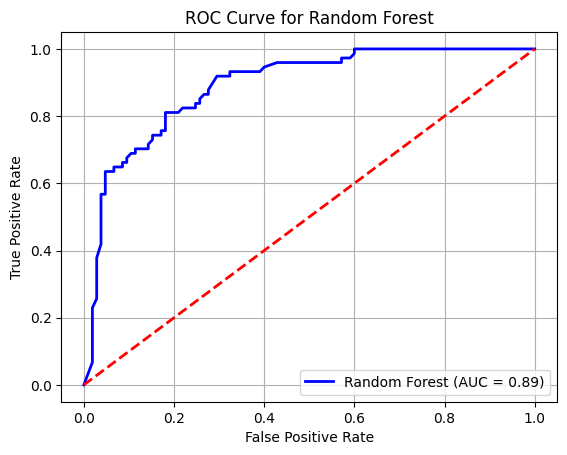

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Завантаження та обробка даних
data = sns.load_dataset('titanic')
X = pd.get_dummies(data[['pclass', 'sex', 'age', 'fare', 'sibsp', 'parch']], drop_first=True)
X['age'] = X['age'].fillna(X['age'].median())
y = data['survived']

# Розділення на тренувальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ініціалізація моделей
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Функція для побудови матриці плутанини та ROC-кривої з AUC
def evaluate_model(model, model_name):
    # Прогнозування класів та ймовірностей
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Ймовірність позитивного класу

    # Матриця плутанини
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix for {model_name}:\n", cm)
    
    # ROC-крива та AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    # Візуалізація ROC-кривої
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Навчання моделей та оцінка результатів
for name, model in models.items():
    model.fit(X_train, y_train)
    evaluate_model(model, name)

Завдання №7 Оптимізація моделі:

Виконайте крос-валідацію для логістичної регресії та дерев рішень.
Оптимізуйте гіперпараметри для випадкового лісу, використовуючи GridSearchCV або RandomizedSearchCV.

In [11]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Завантаження датасету Titanic
data = sns.load_dataset('titanic')

# Вибір ознак та мітки
X = data[['pclass', 'sex', 'age', 'fare', 'sibsp', 'parch']]
y = data['survived']

# Обробка категоріальних змінних
X = pd.get_dummies(X, drop_first=True)

# Заповнення пропущених значень у колонці 'age'
X['age'] = X['age'].fillna(X['age'].median())

# Розділення даних на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Логістична регресія
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Крос-валідація для логістичної регресії
log_reg_cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5)
print("Logistic Regression Cross-Validation Scores:", log_reg_cv_scores)
print("Mean Cross-Validation Score:", log_reg_cv_scores.mean())

# Дерева рішень
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Крос-валідація для дерев рішень
tree_cv_scores = cross_val_score(tree_model, X_train, y_train, cv=5)
print("\nDecision Tree Cross-Validation Scores:", tree_cv_scores)
print("Mean Cross-Validation Score:", tree_cv_scores.mean())

# Оптимізація гіперпараметрів для випадкового лісу
rf_model = RandomForestClassifier()

# Визначення параметрів для GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Виведення найкращих параметрів
print("\nBest parameters for Random Forest:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Logistic Regression Cross-Validation Scores: [0.81818182 0.79020979 0.78873239 0.73239437 0.78873239]
Mean Cross-Validation Score: 0.7836501526642371

Decision Tree Cross-Validation Scores: [0.74825175 0.71328671 0.77464789 0.76760563 0.78169014]
Mean Cross-Validation Score: 0.7570964247020585
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best parameters for Random Forest: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation score: 0.8342558849601103


Завдання №8 Порівняння моделей:

Порівняйте ефективність кожної моделі на основі метрик (точність, precision, recall, F1-score) та виберіть найкращу модель.

In [13]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Завантаження та обробка даних
data = sns.load_dataset('titanic')
X = pd.get_dummies(data[['pclass', 'sex', 'age', 'fare', 'sibsp', 'parch']], drop_first=True)
X['age'] = X['age'].fillna(X['age'].median())
y = data['survived']

# Розділення даних
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Тренування моделей
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

metrics = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    }

# Створення DataFrame з результатами
results_df = pd.DataFrame(metrics).T
print(results_df)

# Визначення найкращої моделі
best_model = results_df['F1-score'].idxmax()
print(f"\nBest Model Based on F1-score: {best_model}")

                     Accuracy  Precision    Recall  F1-score
Logistic Regression  0.810056   0.803030  0.716216  0.757143
Decision Tree        0.754190   0.702703  0.702703  0.702703
Random Forest        0.798883   0.771429  0.729730  0.750000

Best Model Based on F1-score: Logistic Regression


Завдання №9 Завдання з творчим підходом:

Проаналізуйте важливість ознак для моделі випадкового лісу та з’ясуйте, які змінні найбільше впливають на виживання.
Запропонуйте власні ідеї для покращення моделі (наприклад, додавання нових ознак або удосконалення способів обробки пропущених даних).

Аналіз отриманих результатів:
Після виконання цього коду ми отримаємо графік важливості ознак, який показує, які з них найбільше впливають на передбачення моделі. Найважливіші ознаки можуть включати такі, як клас (pclass), вік (age), тариф (fare), стать (sex_male), кількість братів і сестер/дружин на борту (sibsp). Важливість кожної ознаки може варіювати залежно від обробки даних та налаштувань моделі.

Ідеї для покращення моделі:
Додавання нових ознак:

FamilySize: Можна додати нову ознаку, яка представляє загальний розмір родини, об’єднавши sibsp і parch. Це може дати більше інформації про ймовірність виживання, оскільки більші сім’ї могли мати більші шанси на виживання через допомогу одне одному.
Title: Виділення титулу з імені (наприклад, Mr., Mrs., Miss) може допомогти моделі розпізнавати соціальний статус пасажира, що, в свою чергу, може бути пов’язане з ймовірністю виживання.
Cabin Section: Можна спробувати виділити першу літеру каюти (Cabin) як ознаку, яка вказує на місцезнаходження пасажира в кораблі. Хоча багато значень у Cabin відсутні, інформація про розташування каюти може бути корисною.
Обробка пропущених даних:

Замість заповнення age тільки медіанним значенням, можна побудувати модель регресії (наприклад, лінійної регресії або KNN) для прогнозування віку на основі інших характеристик, таких як pclass, sex, fare. Це дозволить краще врахувати різні групи пасажирів і зробити значення більш реалістичними.
Embarked: Для пропусків у колонці embarked можна скористатися модою або передбачити за допомогою інших ознак.
Нормалізація та стандартизація:

Нормалізація ознак, таких як fare, може допомогти зменшити вплив викидів і покращити продуктивність моделі. Це особливо корисно для моделей, чутливих до масштабу ознак.
Збалансування даних:

Перевірте, чи збалансовані класи виживших і невиживших. Якщо спостерігається значний дисбаланс, можна спробувати використовувати методи, такі як oversampling (наприклад, SMOTE) для меншого класу або undersampling для більшого класу.
Оптимізація гіперпараметрів:

Використання GridSearchCV або RandomizedSearchCV для підбору гіперпараметрів моделі випадкового лісу може покращити її продуктивність. Наприклад, можна налаштувати n_estimators, max_depth, min_samples_split, min_samples_leaf.